# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [26]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Высшее', 'Два и более высших образования', 'Ученая степень', 'Среднее', 'Неполное среднее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Управляющая компания', 'Информационные технологии', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Транспорт', 'Строительство', 'Образование', 'Подбор персонала', 'Энергетика', 'СМИ/Реклама/PR-агенства', 'Банк/Финансы', 'Развлечения/Искусство', 'Маркетинг', 'Ресторанный бизнес/Общественное питание', 'Коммунальное хоз-во/Дорожные службы', 'Логистика', 'Недвижимость', 'Нефтегазовая промышленность', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Туризм', 'Химия/Парфюмерия/Фармацевтика', 'Другие сферы', 'Сборочные производства', 'Государственная служба', 'Страхование', 'Торговля', 'Салоны красоты и здоровья', 'Сельское хозяйство', 'Информационные услуги', 'Наука'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [25]:
df['PERSONAL_INCOME']=df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')


In [38]:
df.head();

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
Судя по df.info(), есть несколько столбцов с тем или иным количеством пропущенных значений.
Больше всего пропусков у PREVIOUS_CARD_NUM_UTILIZED. Лучше бы удалить этот столбец, он малоинформативен.
Пропуски в WORK_TIME - заменить медианой,
Пропуски в ORG_TP_FCAPITAL, TP_PROVINCEЧ, JOB_DIR, ORG_TP_STATE, GEN_TITLE, GEN_INDUSTRY - Нулевой вектор после one-hot-encoding. 



#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
ORG_TP_FCAPITAL, TP_PROVINCE, JOB_DIR, ORG_TP_STATE, GEN_TITLE, GEN_INDUSTRY,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE - категориальные признаки
Для всех следует сделать OHE. Следует отметить ORG_TP_FCAPITAL, который вообще-то принимает два значения. Но т.к. там есть пропуски,
мы можем их считать за отдельный класс. 

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [102]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output.drop(['AGREEMENT_RK'], axis=1, inplace=True)
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace=True)
    
    for col in ['PERSONAL_INCOME','FST_PAYMENT','LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT','CREDIT']:
        df_output[col]=df_output[col].map(lambda x: x.replace(',', '.')).astype('float')
    
    C = ['ORG_TP_FCAPITAL', 'TP_PROVINCE', 
         'JOB_DIR', 'ORG_TP_STATE', 
         'GEN_TITLE', 'GEN_INDUSTRY', 
         'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
         'REG_ADDRESS_PROVINCE',
         'REGION_NM', 'FAMILY_INCOME',
         'EDUCATION', 'MARITAL_STATUS']

    df_output = pd.get_dummies(df_output, columns = C, dummy_na=True)

    df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].median(), inplace=True)
    
    return df_output

In [103]:
df_preproc = df.pipe(preproc_data)
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)
print(df_train_preproc.shape, df_test_preproc.shape)

(15223, 455) (14910, 455)


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [105]:
X = df_train_preproc.drop(["TARGET"], axis=1)
X_test = df_test_preproc.drop(["TARGET"], axis=1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

print(X.shape, X_test.shape, y.shape, y_test.shape)

(15223, 454) (14910, 454) (15223,) (14910,)


In [112]:
# import numpy as np

# for i in X.columns: # перебираем все столбцы
#     if np.any(np.isnan(df[i])):
#         print('='*10)
#         print(i) # выводим название столбца
#         print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
#         print('\n') # выводим пустую строку

#### Задание 5. Обучение и оценка качества разных моделей

In [80]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
??????????????????? зачем, если у нас уже есть тестовая и обучающая выборки?
## Your Code Here


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [175]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
rfl = RandomForestClassifier()
lr = LogisticRegression()
models = [dtc, rfl, lr]
preds = dict()
probs = dict()
for clf in models:
    clf.fit(X, y)
    preds[clf.__class__.__name__] = clf.predict(X_test)
    probs[clf.__class__.__name__] = clf.predict_proba(X_test)

print(preds)
print(probs)

{'DecisionTreeClassifier': array([0, 0, 0, ..., 1, 0, 1], dtype=int64), 'RandomForestClassifier': array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 'LogisticRegression': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}
{'DecisionTreeClassifier': array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]]), 'RandomForestClassifier': array([[ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 0.7,  0.3],
       ..., 
       [ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 0.7,  0.3]]), 'LogisticRegression': array([[ 0.84191815,  0.15808185],
       [ 0.94227018,  0.05772982],
       [ 0.82170881,  0.17829119],
       ..., 
       [ 0.81275489,  0.18724511],
       [ 0.94484866,  0.05515134],
       [ 0.81557903,  0.18442097]])}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [176]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

D = dict()

for clf in models:
#     print(roc_auc_score(y_test, probs[clf.__class__][:, 1]))
    D[clf.__class__.__name__] = []
    D[clf.__class__.__name__].append(accuracy_score(y_test, preds[clf.__class__.__name__]))
    D[clf.__class__.__name__].append(precision_score(y_test, preds[clf.__class__.__name__]))
    D[clf.__class__.__name__].append(recall_score(y_test, preds[clf.__class__.__name__]))

D = pd.DataFrame(data=D, index=['accuracy', 'precision', 'recacll']).T
D

,accuracy,precision,recacll
DecisionTreeClassifier,0.802951,0.166667,0.169714
LogisticRegression,0.882294,0.000000,0.000000
RandomForestClassifier,0.880282,0.192982,0.006286


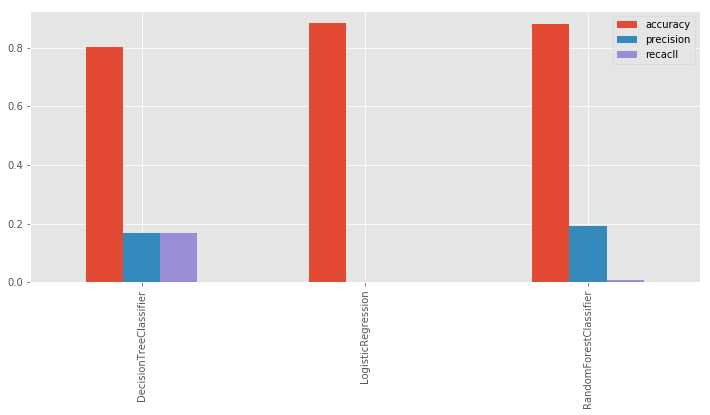

In [177]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

D.plot(kind='bar')

,accuracy,precision,recacll,roc-auc
DecisionTreeClassifier,0.802951,0.166667,0.169714,0.528436
LogisticRegression,0.882294,0.000000,0.000000,0.595897
RandomForestClassifier,0.880282,0.192982,0.006286,0.625753


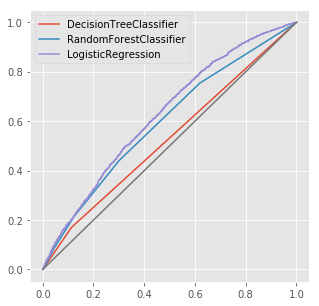

In [187]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))
rocs = []

for key in probs:
    rocs.append(roc_auc_score(y_test, probs[key][:, 1]))
    curve = roc_curve(y_test, probs[key][:, 1])
    plt.plot(curve[0], curve[1], label=key)

plt.plot([0, 1], [0, 1])
plt.legend()

D['roc-auc'] = rocs
D

In [179]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
mean_roc = []
for clf in models:
    mean_roc.append(
        sum(
            cross_val_score(
                clf,
                X,
                y,
                scoring='roc_auc',
                cv=10
            )
        )/10
    )
mean_roc

[0.53175603084224643, 0.58241288520581569, 0.64836641562246078]

In [183]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
best_model = models[np.argmax(mean_roc)]
probs[best_model.__class__.__name__]
## Your Code Here

array([[ 0.84191815,  0.15808185],
       [ 0.94227018,  0.05772982],
       [ 0.82170881,  0.17829119],
       ..., 
       [ 0.81275489,  0.18724511],
       [ 0.94484866,  0.05515134],
       [ 0.81557903,  0.18442097]])

In [185]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

"Изначально рассчитывал все для test, надеюсь, это не критично относительно оценки выполнения задания"

D

,accuracy,precision,recacll,roc-auc
DecisionTreeClassifier,0.802951,0.166667,0.169714,0.528436
LogisticRegression,0.882294,0.000000,0.000000,0.595897
RandomForestClassifier,0.880282,0.192982,0.006286,0.625753


### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)